# EDA on Dr Trish data

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

all_users_df = pd.read_csv("data/raw/trish_all_users_data.csv")
map_patient_id_to_names = pd.read_csv("data/raw/users_meta_data.csv")
test_group_names = pd.read_csv("data/raw/test_group_list.csv")



In [73]:
# get patient_id of all first_name and last_name in patient_list
test_group_ids = map_patient_id_to_names[map_patient_id_to_names['first_name'].isin(test_group_names['first_name']) & map_patient_id_to_names['last_name'].isin(test_group_names['last_name'])]['patient_id']
print(f"Number of patients ids in test group: {len(test_group_ids)}, out of {len(test_group_names)} names provided and {map_patient_id_to_names.shape[0]} total available patients")

rows_before = all_users_df.shape[0]
all_users_df = all_users_df[all_users_df['patient_id'].isin(test_group_ids)]
rows_after = all_users_df.shape[0]
print(f"Number of rows removed: {rows_before - rows_after}, out of {rows_before} rows. Remaining rows: {rows_after}")

Number of patients ids in test group: 204, out of 235 names provided and 355 total available patients
Number of rows removed: 3462, out of 7404 rows. Remaining rows: 3942


In [74]:
COLS_QEEG = ['QEEG_alpha_eyesClosed_Cz',
 'QEEG_alpha_eyesClosed_F3',
 'QEEG_alpha_eyesClosed_F4',
 'QEEG_alpha_eyesClosed_Fp1',
 'QEEG_alpha_eyesClosed_Fp2',
 'QEEG_alpha_eyesClosed_Fz',
 'QEEG_alpha_eyesClosed_O1',
 'QEEG_alpha_eyesClosed_Tp10',
 'QEEG_alpha_eyesClosed_Tp9',
 'QEEG_alpha_eyesOpened_Cz',
 'QEEG_alpha_eyesOpened_F3',
 'QEEG_alpha_eyesOpened_F4',
 'QEEG_alpha_eyesOpened_Fp1',
 'QEEG_alpha_eyesOpened_Fp2',
 'QEEG_alpha_eyesOpened_Fz',
 'QEEG_alpha_eyesOpened_O1',
 'QEEG_alpha_eyesOpened_Tp10',
 'QEEG_alpha_eyesOpened_Tp9',
 'QEEG_beta_eyesClosed_Cz',
 'QEEG_beta_eyesClosed_F3',
 'QEEG_beta_eyesClosed_F4',
 'QEEG_beta_eyesClosed_Fp1',
 'QEEG_beta_eyesClosed_Fp2',
 'QEEG_beta_eyesClosed_Fz',
 'QEEG_beta_eyesClosed_O1',
 'QEEG_beta_eyesClosed_Tp10',
 'QEEG_beta_eyesClosed_Tp9',
 'QEEG_beta_eyesOpened_Cz',
 'QEEG_beta_eyesOpened_F3',
 'QEEG_beta_eyesOpened_F4',
 'QEEG_beta_eyesOpened_Fp1',
 'QEEG_beta_eyesOpened_Fp2',
 'QEEG_beta_eyesOpened_Fz',
 'QEEG_beta_eyesOpened_O1',
 'QEEG_beta_eyesOpened_Tp10',
 'QEEG_beta_eyesOpened_Tp9',
 'QEEG_delta_eyesClosed_Cz',
 'QEEG_delta_eyesClosed_F3',
 'QEEG_delta_eyesClosed_F4',
 'QEEG_delta_eyesClosed_Fp1',
 'QEEG_delta_eyesClosed_Fp2',
 'QEEG_delta_eyesClosed_Fz',
 'QEEG_delta_eyesClosed_O1',
 'QEEG_delta_eyesClosed_Tp10',
 'QEEG_delta_eyesClosed_Tp9',
 'QEEG_delta_eyesOpened_Cz',
 'QEEG_delta_eyesOpened_F3',
 'QEEG_delta_eyesOpened_F4',
 'QEEG_delta_eyesOpened_Fp1',
 'QEEG_delta_eyesOpened_Fp2',
 'QEEG_delta_eyesOpened_Fz',
 'QEEG_delta_eyesOpened_O1',
 'QEEG_delta_eyesOpened_Tp10',
 'QEEG_delta_eyesOpened_Tp9',
 'QEEG_high_alpha_eyesClosed_Cz',
 'QEEG_high_alpha_eyesClosed_F3',
 'QEEG_high_alpha_eyesClosed_F4',
 'QEEG_high_alpha_eyesClosed_Fp1',
 'QEEG_high_alpha_eyesClosed_Fp2',
 'QEEG_high_alpha_eyesClosed_Fz',
 'QEEG_high_alpha_eyesClosed_O1',
 'QEEG_high_alpha_eyesClosed_Tp10',
 'QEEG_high_alpha_eyesClosed_Tp9',
 'QEEG_high_alpha_eyesOpened_Cz',
 'QEEG_high_alpha_eyesOpened_F3',
 'QEEG_high_alpha_eyesOpened_F4',
 'QEEG_high_alpha_eyesOpened_Fp1',
 'QEEG_high_alpha_eyesOpened_Fp2',
 'QEEG_high_alpha_eyesOpened_Fz',
 'QEEG_high_alpha_eyesOpened_O1',
 'QEEG_high_alpha_eyesOpened_Tp10',
 'QEEG_high_alpha_eyesOpened_Tp9',
 'QEEG_high_beta_eyesClosed_Cz',
 'QEEG_high_beta_eyesClosed_F3',
 'QEEG_high_beta_eyesClosed_F4',
 'QEEG_high_beta_eyesClosed_Fp1',
 'QEEG_high_beta_eyesClosed_Fp2',
 'QEEG_high_beta_eyesClosed_Fz',
 'QEEG_high_beta_eyesClosed_O1',
 'QEEG_high_beta_eyesClosed_Tp10',
 'QEEG_high_beta_eyesClosed_Tp9',
 'QEEG_high_beta_eyesOpened_Cz',
 'QEEG_high_beta_eyesOpened_F3',
 'QEEG_high_beta_eyesOpened_F4',
 'QEEG_high_beta_eyesOpened_Fp1',
 'QEEG_high_beta_eyesOpened_Fp2',
 'QEEG_high_beta_eyesOpened_Fz',
 'QEEG_high_beta_eyesOpened_O1',
 'QEEG_high_beta_eyesOpened_Tp10',
 'QEEG_high_beta_eyesOpened_Tp9',
 'QEEG_low_alpha_eyesClosed_Cz',
 'QEEG_low_alpha_eyesClosed_F3',
 'QEEG_low_alpha_eyesClosed_F4',
 'QEEG_low_alpha_eyesClosed_Fp1',
 'QEEG_low_alpha_eyesClosed_Fp2',
 'QEEG_low_alpha_eyesClosed_Fz',
 'QEEG_low_alpha_eyesClosed_O1',
 'QEEG_low_alpha_eyesClosed_Tp10',
 'QEEG_low_alpha_eyesClosed_Tp9',
 'QEEG_low_alpha_eyesOpened_Cz',
 'QEEG_low_alpha_eyesOpened_F3',
 'QEEG_low_alpha_eyesOpened_F4',
 'QEEG_low_alpha_eyesOpened_Fp1',
 'QEEG_low_alpha_eyesOpened_Fp2',
 'QEEG_low_alpha_eyesOpened_Fz',
 'QEEG_low_alpha_eyesOpened_O1',
 'QEEG_low_alpha_eyesOpened_Tp10',
 'QEEG_low_alpha_eyesOpened_Tp9',
 'QEEG_low_beta_eyesClosed_Cz',
 'QEEG_low_beta_eyesClosed_F3',
 'QEEG_low_beta_eyesClosed_F4',
 'QEEG_low_beta_eyesClosed_Fp1',
 'QEEG_low_beta_eyesClosed_Fp2',
 'QEEG_low_beta_eyesClosed_Fz',
 'QEEG_low_beta_eyesClosed_O1',
 'QEEG_low_beta_eyesClosed_Tp10',
 'QEEG_low_beta_eyesClosed_Tp9',
 'QEEG_low_beta_eyesOpened_Cz',
 'QEEG_low_beta_eyesOpened_F3',
 'QEEG_low_beta_eyesOpened_F4',
 'QEEG_low_beta_eyesOpened_Fp1',
 'QEEG_low_beta_eyesOpened_Fp2',
 'QEEG_low_beta_eyesOpened_Fz',
 'QEEG_low_beta_eyesOpened_O1',
 'QEEG_low_beta_eyesOpened_Tp10',
 'QEEG_low_beta_eyesOpened_Tp9',
 'QEEG_slow_eyesClosed_Cz',
 'QEEG_slow_eyesClosed_F3',
 'QEEG_slow_eyesClosed_F4',
 'QEEG_slow_eyesClosed_Fp1',
 'QEEG_slow_eyesClosed_Fp2',
 'QEEG_slow_eyesClosed_Fz',
 'QEEG_slow_eyesClosed_O1',
 'QEEG_slow_eyesClosed_Tp10',
 'QEEG_slow_eyesClosed_Tp9',
 'QEEG_slow_eyesOpened_Cz',
 'QEEG_slow_eyesOpened_F3',
 'QEEG_slow_eyesOpened_F4',
 'QEEG_slow_eyesOpened_Fp1',
 'QEEG_slow_eyesOpened_Fp2',
 'QEEG_slow_eyesOpened_Fz',
 'QEEG_slow_eyesOpened_O1',
 'QEEG_slow_eyesOpened_Tp10',
 'QEEG_theta_eyesClosed_Cz',
 'QEEG_theta_eyesClosed_F3',
 'QEEG_theta_eyesClosed_F4',
 'QEEG_theta_eyesClosed_Fp1',
 'QEEG_theta_eyesClosed_Fp2',
 'QEEG_theta_eyesClosed_Fz',
 'QEEG_theta_eyesClosed_O1',
 'QEEG_theta_eyesClosed_Tp10',
 'QEEG_theta_eyesClosed_Tp9',
 'QEEG_theta_eyesOpened_Cz',
 'QEEG_theta_eyesOpened_F3',
 'QEEG_theta_eyesOpened_F4',
 'QEEG_theta_eyesOpened_Fp1',
 'QEEG_theta_eyesOpened_Fp2',
 'QEEG_theta_eyesOpened_Fz',
 'QEEG_theta_eyesOpened_O1',
 'QEEG_theta_eyesOpened_Tp10',
 'QEEG_theta_eyesOpened_Tp9',]

COLS_RATIOS = ['Theta Symmetry; Frontal Left and Right (F3, F4); Theta (F3) / theta (F4)',
 'Theta/Alpha Ratio; Frontal Left (F3); Theta / alpha',
 'Theta/Alpha Ratio; Frontal Right (F4); Theta / alpha',
 'Theta/Beta Ratio Response While Counting; Central (Cz); [TBR(UT) - TBR(EC)] / TBR(EC)',
 'Theta/Beta Ratio Response; Posterior (O1); [ [Theta / beta] (EC) - [Theta / beta] (EO)] ] / [Theta / beta] (EO)',
 'Theta/Beta Ratio Symmetry; Frontal Left and Right (F3, F4); [Theta / beta] (F3) / [theta / beta] (F4)',
 'Theta/Beta Ratio While Counting; Central (Cz); Theta / beta',
 'Theta/Beta Ratio; Central (Cz); Theta / beta',
 'Theta/Beta Ratio; Frontal Left (F3); Theta / beta',
 'Theta/Beta Ratio; Frontal Right (F4); Theta / beta',
 'Theta/Beta Ratio; Posterior (O1); Theta / beta',
 'Theta/Low-Beta Ratio; Central (Cz); Theta / SMR',
 'Alpha Recovery; Central (Cz); [Alpha(EO) after - Alpha(EO) before] / Alpha(EO) before',
 'Alpha Recovery; Posterior (O1); [Alpha(EO) after - Alpha(EO) before] / Alpha(EO) before',
 'Alpha Response; Central (Cz); [Alpha(EC) - Alpha(EO)] / Alpha(EO)',
 'Alpha Response; Posterior (O1); [Alpha(EC) - Alpha(EO)] / Alpha(EO)',
 'Alpha Symmetry; Frontal Left and Right (F3, F4); Alpha (F3) / alpha (F4)',
 'Beta Balance; Frontal (Fz); HiBeta/Beta',
 'Beta Response While Counting; Central (Cz); [Beta(UT) - Beta(EC)] / Beta(EC)',
 'Beta Symmetry; Frontal Left and Right (F3, F4); Beta (F3) / beta (F4)',
 'Low-alpha/High-alpha Ratio; Frontal (Fz); Low-alpha (8-9Hz) / high-alpha (11-12Hz)',
 'Peak Alpha; Posterior (O1); The maximum amplitude value in the EEG frequency spectrum between 8 and 12 Hz',]

COLS_METADATA = ['date',
                 'age',
                 'gender',
                 'first_ghq_score',
                 'assessment_id',
                 'patient_id',
                 'recordId',
                 'patientId',
                ]

COLS_SIGNAL_QUALITY = ['clean_signal_length',
                       'state',
                       'train_location',
                       'reference_location',
                       'diffsum_1',
                       'diffsum_2',
                       'max_abs_amplitude',
                       'noise_ratio',
                       'raw_signal_length',
                       'total_power',          
                ]

COLS_HZ = ['power_1Hz',
 'power_2Hz',
 'power_3Hz',
 'power_4Hz',
 'power_5Hz',
 'power_6Hz',
 'power_7Hz',
 'power_8Hz',
 'power_9Hz',
 'power_10Hz',
 'power_11Hz',
 'power_12Hz',
 'power_13Hz',
 'power_14Hz',
 'power_15Hz',
 'power_16Hz',
 'power_17Hz',
 'power_18Hz',
 'power_19Hz',
 'power_20Hz',
 'power_21Hz',
 'power_22Hz',
 'power_23Hz',
 'power_24Hz',
 'power_25Hz',
 'power_26Hz',
 'power_27Hz',
 'power_28Hz',
 'power_29Hz',
 'power_30Hz',
]

COLS_BANDS = ['delta',
       'theta',
       'slow',
       'low_alpha',
       'high_alpha',
       'alpha',
       'low_beta',
       'high_beta',
       'beta',
       'alpha_peak',
       'alpha_weighted_peak'
       ]




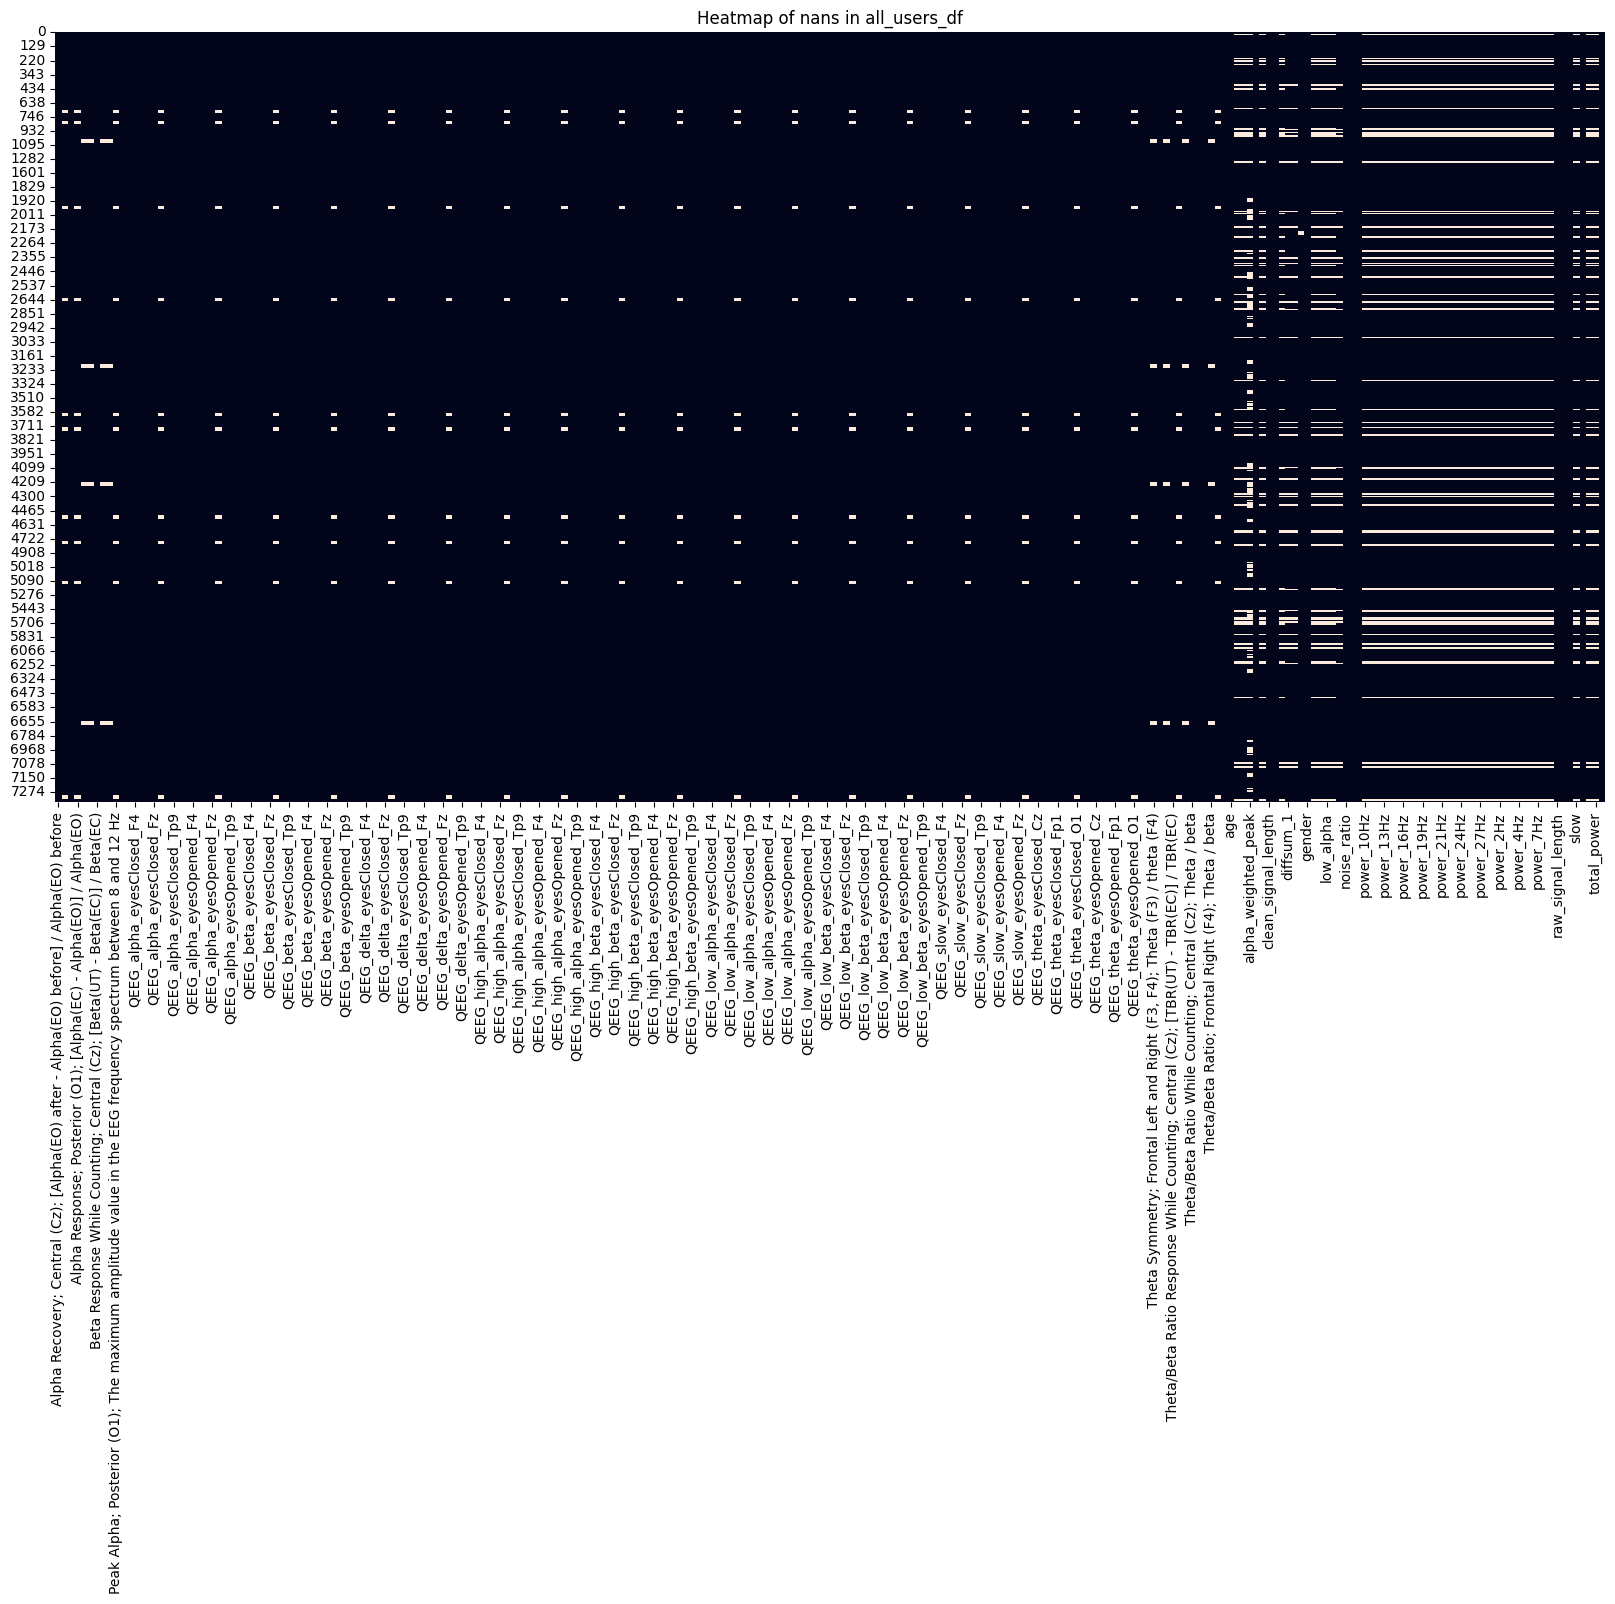

In [75]:
# draw a heatmap of nans for all_users_df
plt.figure(figsize=(20,10))
sns.heatmap(all_users_df.isnull(), cbar=False)
plt.title("Heatmap of nans in all_users_df")
plt.show()


In [ ]:
# Records per patient
all_users_df.groupby("patient_id").size().sort_values(ascending=False)

patient_id
816b4485-4c7a-4c3b-9b17-9427fe472e43    39
af28eef6-dc4c-4cf8-a260-75b374da7a60    39
79871055-5e8c-4110-b6da-0ca166932a3a    38
551682b8-72e1-4e6d-82ac-f01331886436    38
8c8dc541-b773-458e-830f-981c89388dd7    38
                                        ..
5197ea9f-e4a1-42d3-93d1-76c7fb9bb472    17
461f867f-7ca1-4f8b-a569-2e925f8e4fdc    17
b0bf32bb-2f4a-4f12-a6cc-eb940fcfa441    17
82120f23-e7db-42cd-aa4a-ad6a3e66069c    17
8667f705-2b9d-4ebd-a91a-a58cd74251b1    16
Length: 204, dtype: int64

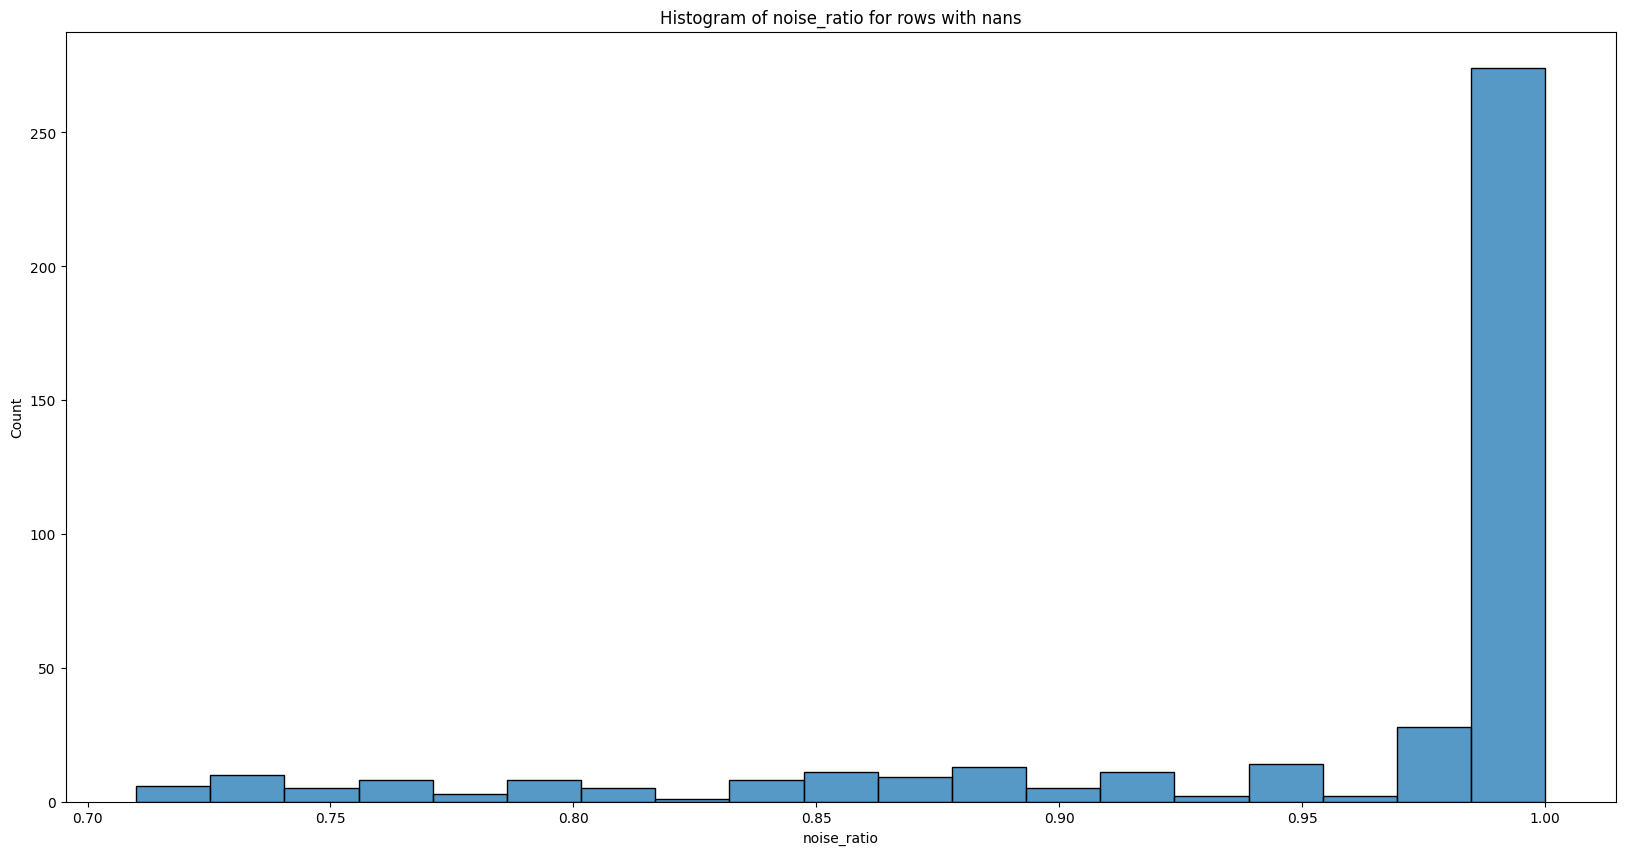

,delta,theta,slow,low_alpha,high_alpha,alpha,low_beta,high_beta,beta,alpha_peak,alpha_weighted_peak,clean_signal_length,state,train_location,reference_location,diffsum_1,diffsum_2,max_abs_amplitude,noise_ratio,raw_signal_length,total_power
6245,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,eyesClosed,Tp10,Fpz,NaN,NaN,NaN,1.00,31,NaN
6256,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,eyesOpened,Af7,Tp10,NaN,NaN,NaN,1.00,30,NaN
6257,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,eyesOpened,Af8,Tp10,NaN,NaN,NaN,1.00,30,NaN
6261,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,eyesClosed,Af7,Tp10,NaN,NaN,NaN,1.00,30,NaN
6262,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,eyesClosed,Af8,Tp10,NaN,NaN,NaN,1.00,30,NaN
6293,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,eyesOpened,Cz,Tp10,914.06,597.39,25.76,0.95,37,NaN
6298,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,eyesClosed,Cz,Tp10,949.31,695.68,27.28,0.97,38,NaN
6303,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,Task Closed,Cz,Tp10,NaN,NaN,NaN,1.00,33,NaN
6337,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,eyesClosed,Af7,Tp10,NaN,NaN,NaN,1.00,38,NaN
6485,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,eyesOpened,Af7,Tp10,NaN,NaN,NaN,1.00,32,NaN


In [97]:
a = all_users_df[COLS_BANDS + COLS_SIGNAL_QUALITY]
a = a[a['alpha'].isna()]
# histogram of noise_ratio for rows with nans
plt.figure(figsize=(20,10))
sns.histplot(a['noise_ratio'])
plt.title("Histogram of noise_ratio for rows with nans")
plt.show()
a.tail(60)

#### Aggregate over the first assessment

In [151]:
# group all_users_df by patient_id and assessmet_id and take the first assessment_id by date
df_first_assessment_qeeg = all_users_df.sort_values('date').groupby(['patient_id']).first().reset_index()[COLS_METADATA + COLS_QEEG].set_index('patient_id')

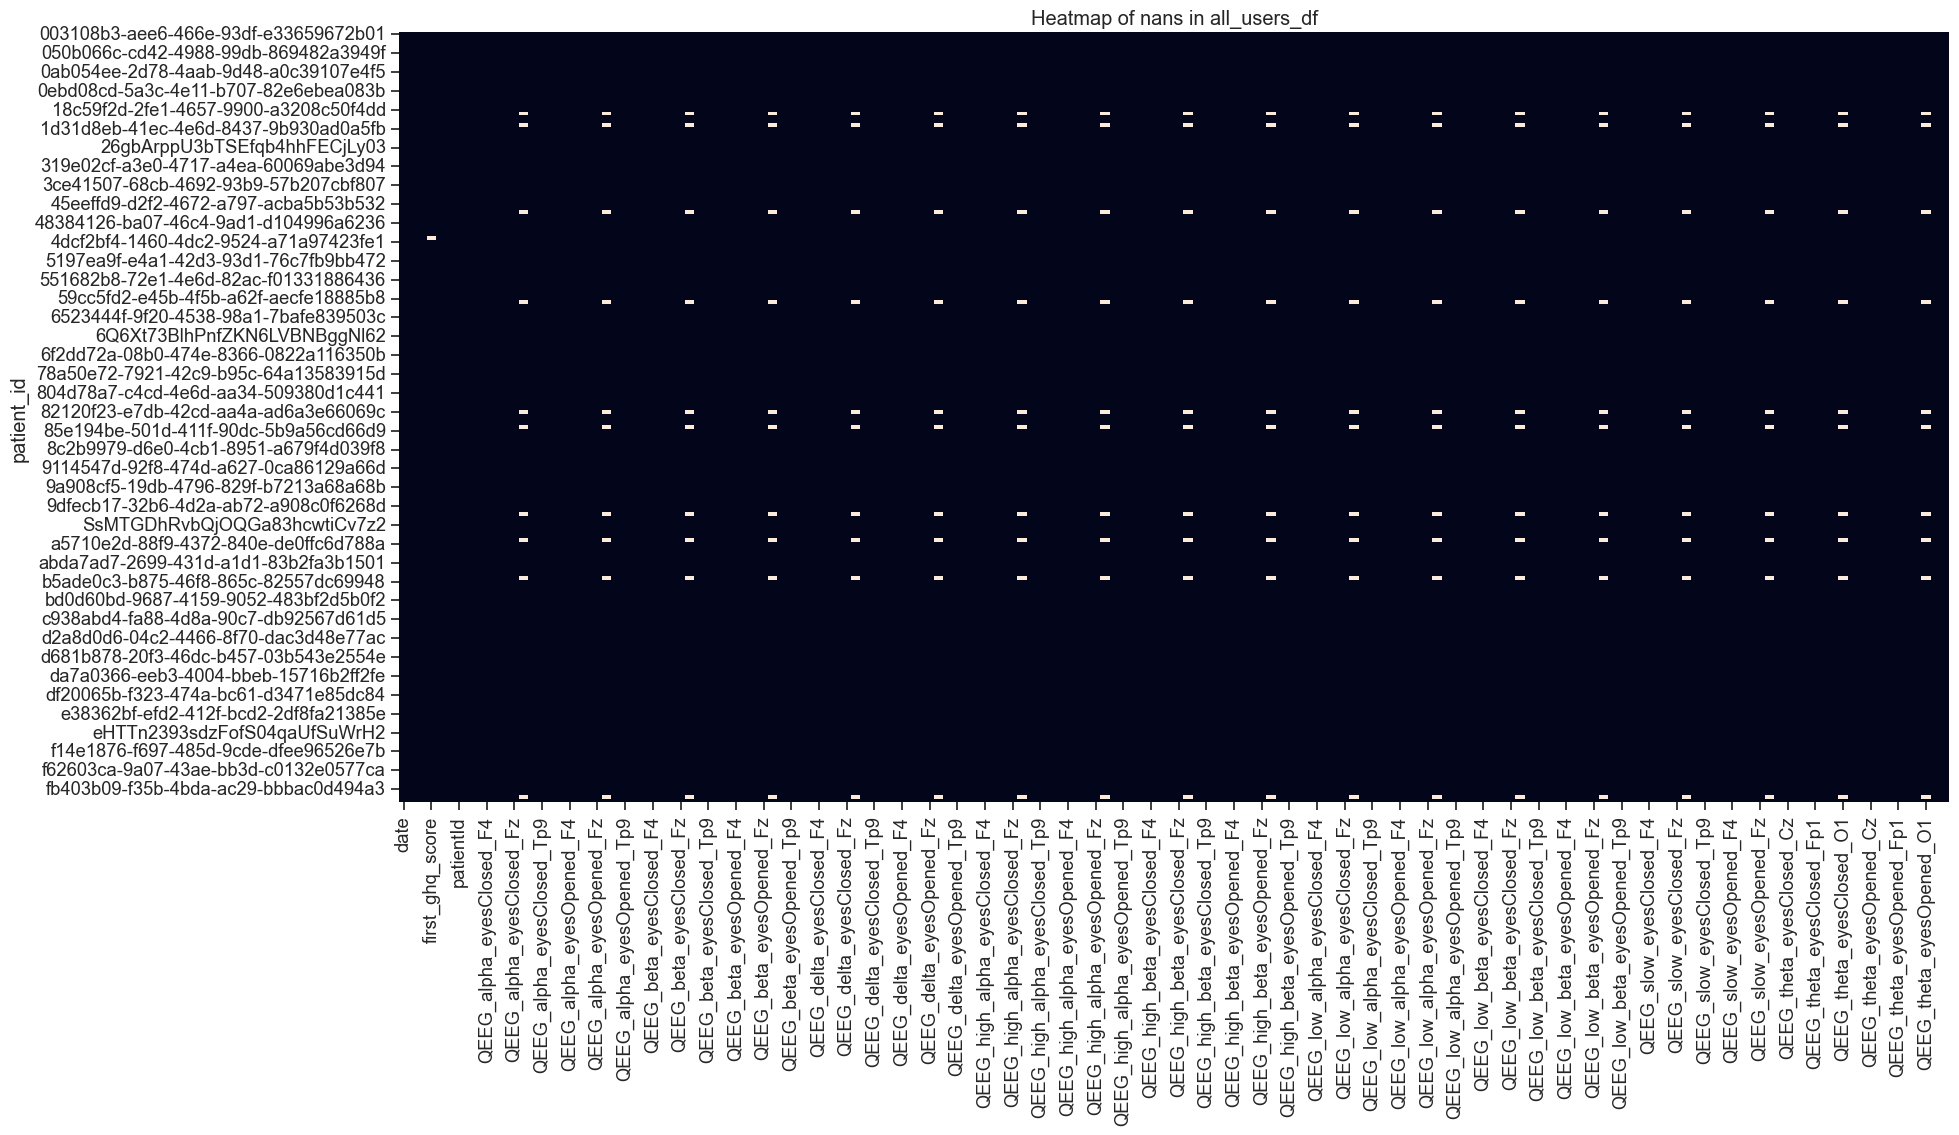

In [152]:
# draw a heatmap of nans for all_users_df
plt.figure(figsize=(20,10))
sns.heatmap(df_first_assessment_qeeg.isnull(), cbar=False)
plt.title("Heatmap of nans in all_users_df")
plt.show()


In [122]:
COLS_QEEG

['QEEG_alpha_eyesClosed_Cz',
 'QEEG_alpha_eyesClosed_F3',
 'QEEG_alpha_eyesClosed_F4',
 'QEEG_alpha_eyesClosed_Fp1',
 'QEEG_alpha_eyesClosed_Fp2',
 'QEEG_alpha_eyesClosed_Fz',
 'QEEG_alpha_eyesClosed_O1',
 'QEEG_alpha_eyesClosed_Tp10',
 'QEEG_alpha_eyesClosed_Tp9',
 'QEEG_alpha_eyesOpened_Cz',
 'QEEG_alpha_eyesOpened_F3',
 'QEEG_alpha_eyesOpened_F4',
 'QEEG_alpha_eyesOpened_Fp1',
 'QEEG_alpha_eyesOpened_Fp2',
 'QEEG_alpha_eyesOpened_Fz',
 'QEEG_alpha_eyesOpened_O1',
 'QEEG_alpha_eyesOpened_Tp10',
 'QEEG_alpha_eyesOpened_Tp9',
 'QEEG_beta_eyesClosed_Cz',
 'QEEG_beta_eyesClosed_F3',
 'QEEG_beta_eyesClosed_F4',
 'QEEG_beta_eyesClosed_Fp1',
 'QEEG_beta_eyesClosed_Fp2',
 'QEEG_beta_eyesClosed_Fz',
 'QEEG_beta_eyesClosed_O1',
 'QEEG_beta_eyesClosed_Tp10',
 'QEEG_beta_eyesClosed_Tp9',
 'QEEG_beta_eyesOpened_Cz',
 'QEEG_beta_eyesOpened_F3',
 'QEEG_beta_eyesOpened_F4',
 'QEEG_beta_eyesOpened_Fp1',
 'QEEG_beta_eyesOpened_Fp2',
 'QEEG_beta_eyesOpened_Fz',
 'QEEG_beta_eyesOpened_O1',
 'QEEG_beta_e

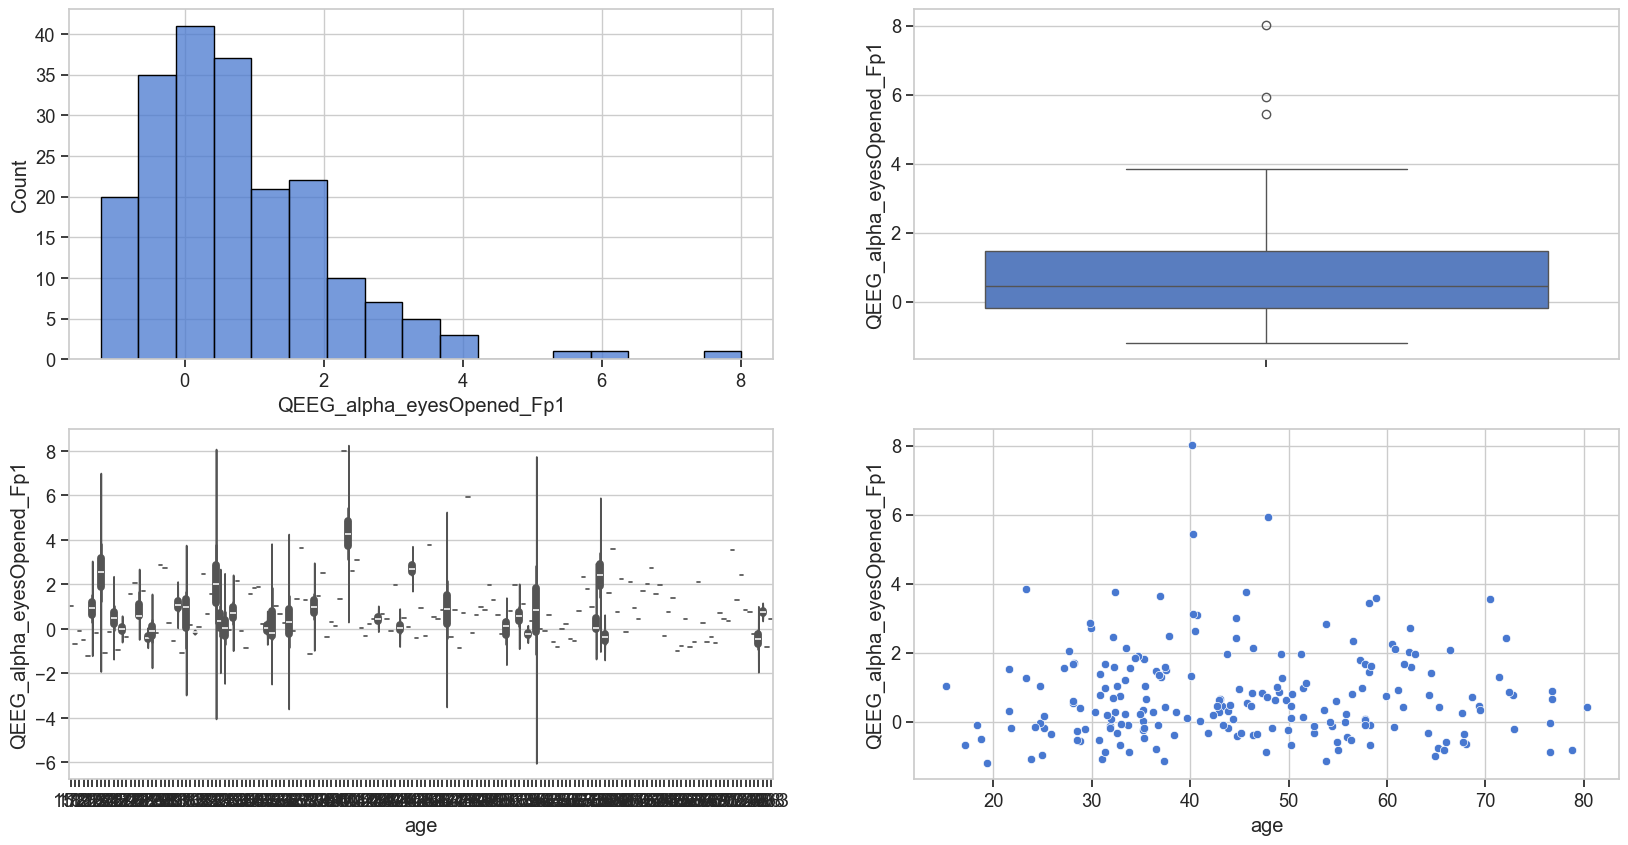

In [171]:
c = "QEEG_alpha_eyesOpened_Fp1"
# in subplots, show statistics of c for all patients. include a histogram, boxplot, and violinplot and a scatterplot of c vs age
fig, axs = plt.subplots(2, 2, figsize=(20,10))
sns.histplot(df_first_assessment_qeeg[c], ax=axs[0,0])
sns.boxplot(data=df_first_assessment_qeeg, y=c, ax=axs[0,1])
sns.violinplot(data=df_first_assessment_qeeg, x='age', y=c, ax=axs[1,0])
sns.scatterplot(data=df_first_assessment_qeeg, x='age', y=c, ax=axs[1,1])
plt.show()


In [ ]:
# end of pre processing

In [172]:
# The column c, e.g. 'QEEG_alpha_eyesOpened_Fz' have standardized values (z-scores). how can we check if values are statistically significant?
# answer: we can use a t-test to check if the mean of the values is significantly different from 0.
from scipy.stats import ttest_1samp
# lets remove outliers first
sd_threshold = 2.5
samples = df_first_assessment_qeeg[c]
mean = samples.mean()
std = samples.std()
outliers = samples[(samples - mean).abs() > sd_threshold * std]
print(f"Number of outliers: {outliers.shape[0]}")
# remove outliers
samples = samples.drop(outliers.index)
# perform t-test
t_stat, p_value = ttest_1samp(samples, 0)
print(f"t-statistic: {t_stat}, p-value: {p_value}")
# p-value is less than 0.05, so we can reject the null hypothesis that the mean of the values is 0. Therefore, the values are statistically significant.



Number of outliers: 3
t-statistic: 8.227598006642193, p-value: 2.4128418752831824e-14


Statistical Analysis of Alpha Wave Values in Abnormal vs. Normal Populations
Summary Statistics for Abnormal Population (Z-scores):
Number of observations: 201
Mean: 0.6657
Standard Deviation: 1.1470
Median: 0.4410
25th Percentile: -0.1800
75th Percentile: 1.4050
Minimum: -1.2090
Maximum: 3.8290


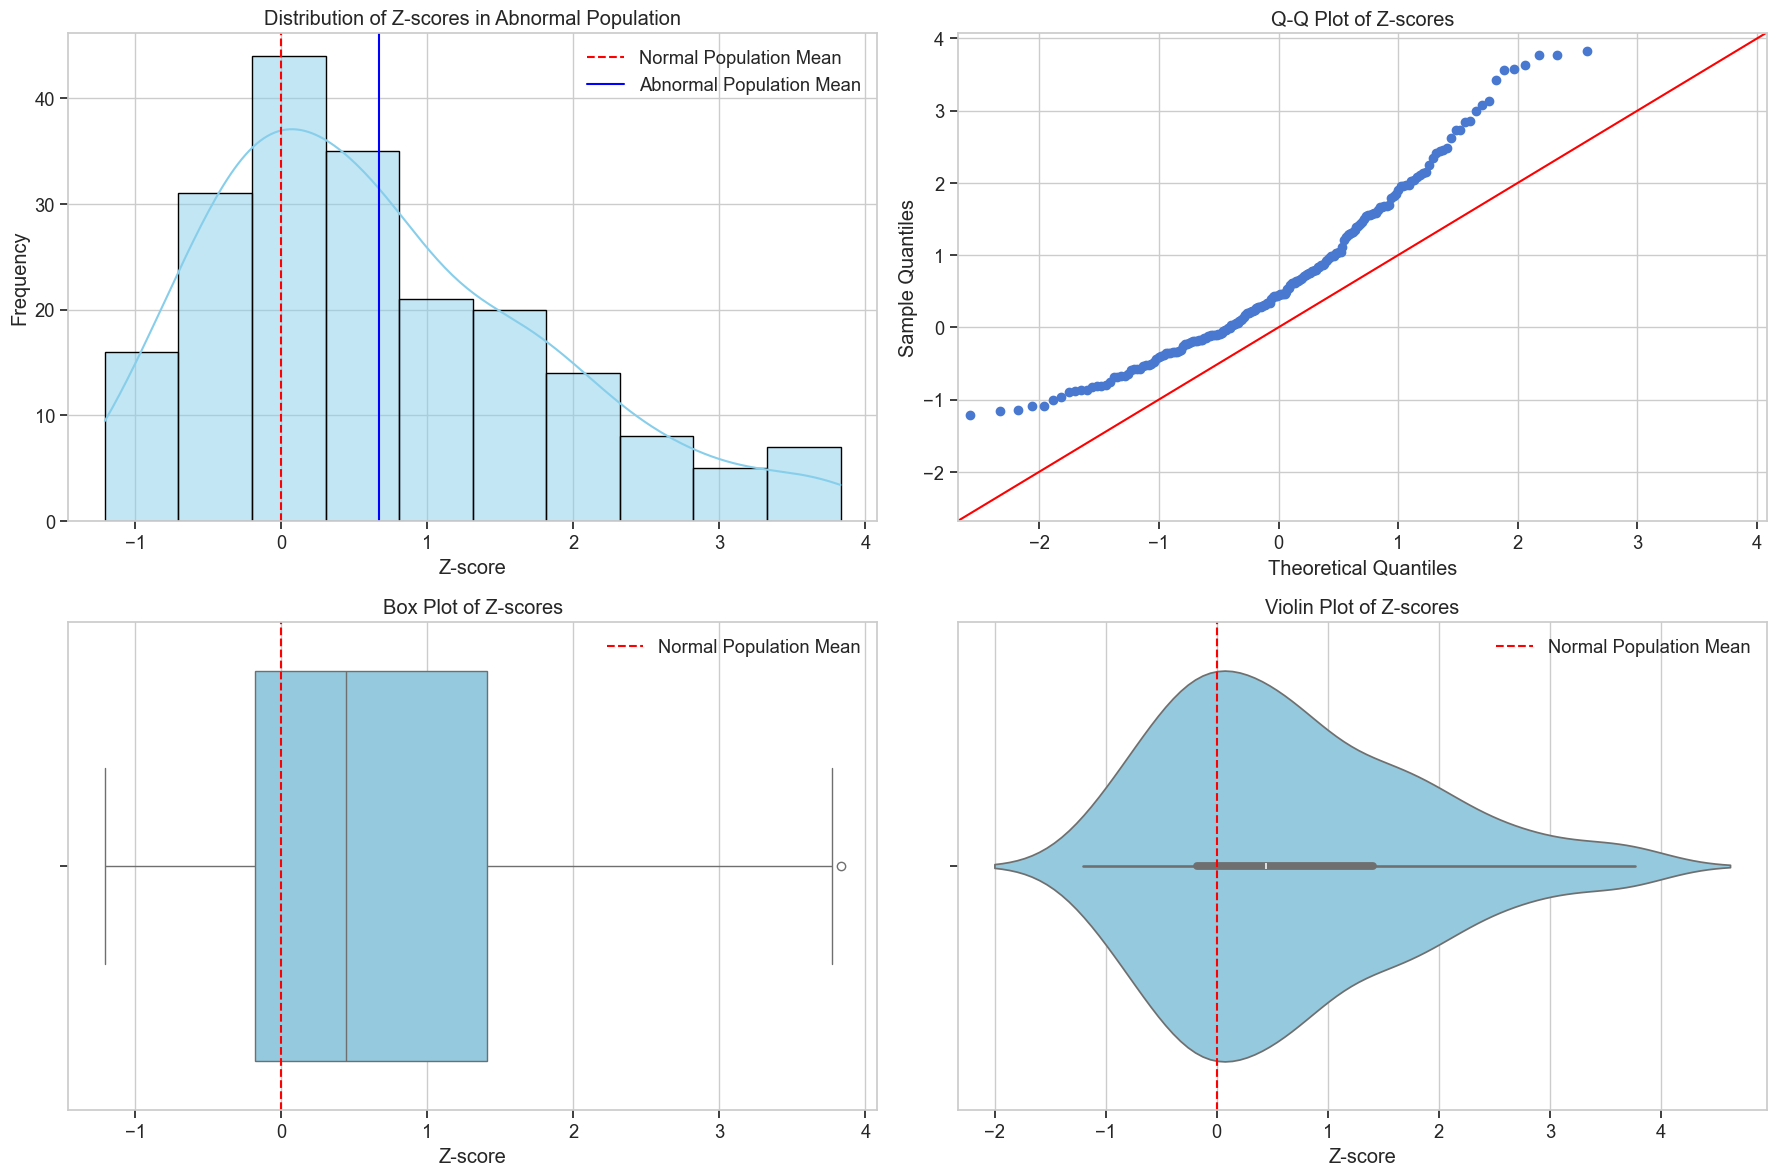


Normality Tests:
Shapiro-Wilk test: statistic=0.949723, p-value=0.000002
Kolmogorov-Smirnov test with Lilliefors correction: statistic=0.092165, p-value=0.001000
D'Agostino-Pearson test: statistic=16.738042, p-value=0.000232
Anderson-Darling test:
  Statistic: 2.732863
  Critical Values:
    15%: 0.565
    10%: 0.644
    5%: 0.772
    2.5%: 0.901
    1%: 1.071

One-Sample T-Test:
t-statistic: 8.227598
p-value: 0.000000
Cohen's d: 0.665657
Effect size interpretation: medium


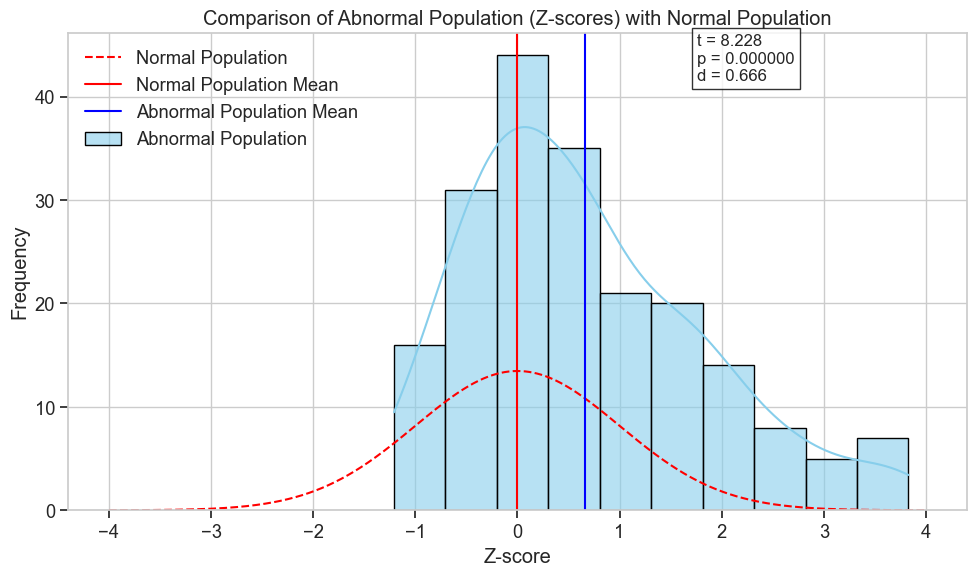


Wilcoxon Signed-Rank Test:
W-statistic: 4545.500000
p-value: 0.000000
Effect size (r): 0.478803
Effect size interpretation: medium

95.0% Bootstrap Confidence Interval for Mean:
Lower bound: 0.508002
Upper bound: 0.824799


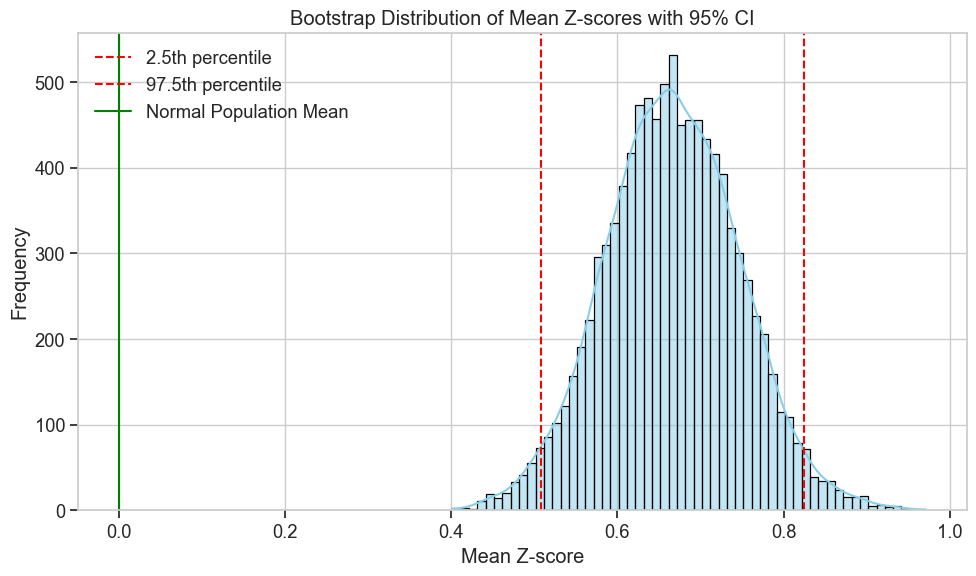


Statistical Power Analysis:
Effect size (Cohen's d): 0.665657
Sample size: 201
Alpha (significance level): 0.05
Achieved power: 1.000000
Required sample size for 80% power: 20
Required sample size for 90% power: 26


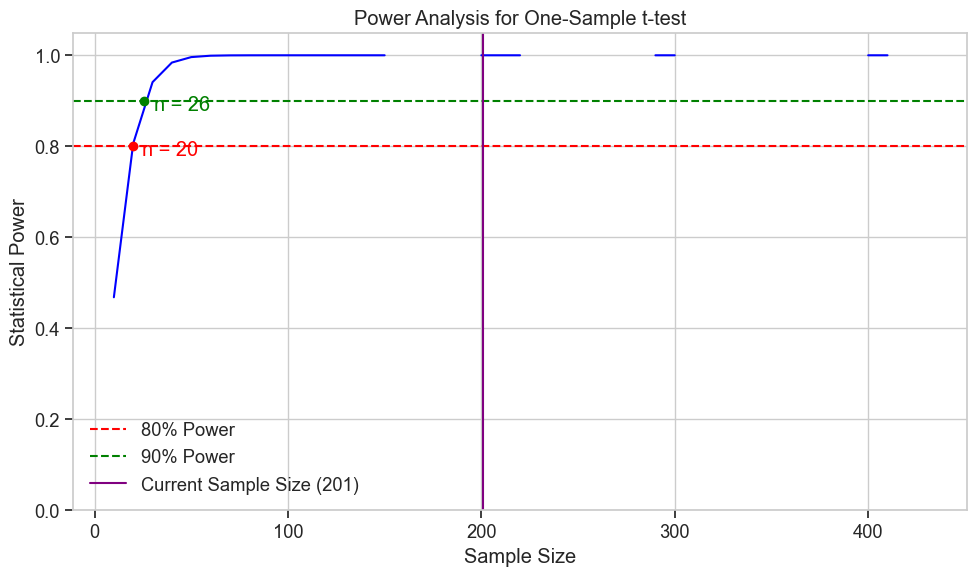


Summary of Results:
Sample size: 201
Mean Z-score: 0.6657
Standard Deviation of Z-scores: 1.1470

Parametric Test (One-Sample t-test):
t-statistic: 8.2276, p-value: 0.000000
Effect size (Cohen's d): 0.6657

Non-parametric Test (Wilcoxon Signed-Rank Test):
W-statistic: 4545.5000, p-value: 0.000000
Effect size (r): 0.4788

95% Bootstrap Confidence Interval for Mean:
CI: [0.5080, 0.8248]

Statistical Power:
Achieved power with current sample size: 1.0000
Required sample size for 80% power: 20
Required sample size for 90% power: 26

Statistical Decision:
Since p-value (0.000000) < alpha (0.05), we reject the null hypothesis.
Conclusion: There is a statistically significant difference in alpha wave values
between the abnormal and normal populations.

Note: The above conclusion should be interpreted in the context of the normality tests,
effect size, confidence intervals, and power analysis.


In [173]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.power import TTestPower
from statsmodels.stats.diagnostic import lilliefors
import statsmodels.api as sm
from matplotlib.ticker import MaxNLocator

# Set the aesthetic style of the plots
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("muted")
sns.set_context("notebook", font_scale=1.2)

# For reproducibility
np.random.seed(42)

z_scores = samples.values # for sanity check use: np.random.normal(loc=0.3, scale=1.1, size=204)

# Step 1: Data Exploration and Visualization

def explore_data(z_scores):
    """
    Perform exploratory data analysis on the z-scores.
    This includes calculating summary statistics and visualizing the data.
    """
    # Calculate basic statistics
    n = len(z_scores)
    mean_z = np.mean(z_scores)
    std_z = np.std(z_scores, ddof=1)
    median_z = np.median(z_scores)
    q1 = np.percentile(z_scores, 25)
    q3 = np.percentile(z_scores, 75)
    min_z = np.min(z_scores)
    max_z = np.max(z_scores)
    
    # Print summary statistics
    print("Summary Statistics for Abnormal Population (Z-scores):")
    print(f"Number of observations: {n}")
    print(f"Mean: {mean_z:.4f}")
    print(f"Standard Deviation: {std_z:.4f}")
    print(f"Median: {median_z:.4f}")
    print(f"25th Percentile: {q1:.4f}")
    print(f"75th Percentile: {q3:.4f}")
    print(f"Minimum: {min_z:.4f}")
    print(f"Maximum: {max_z:.4f}")
    
    # Create a figure with multiple plots
    fig = plt.figure(figsize=(18, 12))
    
    # 1. Histogram with kernel density estimate
    ax1 = fig.add_subplot(221)
    sns.histplot(z_scores, kde=True, ax=ax1, color='skyblue')
    ax1.axvline(x=0, color='red', linestyle='--', label='Normal Population Mean')
    ax1.axvline(x=mean_z, color='blue', linestyle='-', label='Abnormal Population Mean')
    ax1.set_title('Distribution of Z-scores in Abnormal Population')
    ax1.set_xlabel('Z-score')
    ax1.set_ylabel('Frequency')
    ax1.legend()
    
    # 2. Q-Q plot to assess normality
    ax2 = fig.add_subplot(222)
    sm.qqplot(z_scores, line='45', ax=ax2)
    ax2.set_title('Q-Q Plot of Z-scores')
    
    # 3. Box plot
    ax3 = fig.add_subplot(223)
    sns.boxplot(x=z_scores, ax=ax3, color='skyblue')
    ax3.axvline(x=0, color='red', linestyle='--', label='Normal Population Mean')
    ax3.set_title('Box Plot of Z-scores')
    ax3.set_xlabel('Z-score')
    ax3.legend()
    
    # 4. Violin plot
    ax4 = fig.add_subplot(224)
    sns.violinplot(x=z_scores, ax=ax4, color='skyblue')
    ax4.axvline(x=0, color='red', linestyle='--', label='Normal Population Mean')
    ax4.set_title('Violin Plot of Z-scores')
    ax4.set_xlabel('Z-score')
    ax4.legend()
    
    plt.tight_layout()
    plt.show()
    
    return mean_z, std_z, n

# Step 2: Check Assumptions for Parametric Tests

def check_normality(z_scores):
    """
    Check normality assumption using multiple methods.
    This includes Shapiro-Wilk, Kolmogorov-Smirnov, D'Agostino-Pearson, and Anderson-Darling tests.
    """
    # Shapiro-Wilk test (suitable for samples up to ~5000)
    shapiro_stat, shapiro_p = stats.shapiro(z_scores)
    
    # Kolmogorov-Smirnov test with Lilliefors correction
    ks_stat, ks_p = lilliefors(z_scores)
    
    # D'Agostino-Pearson test
    k2, dagostino_p = stats.normaltest(z_scores)
    
    # Anderson-Darling test
    anderson_result = stats.anderson(z_scores, dist='norm')
    
    print("\nNormality Tests:")
    print(f"Shapiro-Wilk test: statistic={shapiro_stat:.6f}, p-value={shapiro_p:.6f}")
    print(f"Kolmogorov-Smirnov test with Lilliefors correction: statistic={ks_stat:.6f}, p-value={ks_p:.6f}")
    print(f"D'Agostino-Pearson test: statistic={k2:.6f}, p-value={dagostino_p:.6f}")
    print("Anderson-Darling test:")
    print(f"  Statistic: {anderson_result.statistic:.6f}")
    print("  Critical Values:")
    for i, size in enumerate([15, 10, 5, 2.5, 1]):
        print(f"    {size}%: {anderson_result.critical_values[i]}")
    
    return shapiro_p, ks_p, dagostino_p

# Step 3: Perform One-Sample t-test

def one_sample_t_test(z_scores):
    """
    Perform a one-sample t-test to compare abnormal population to normal population.
    """
    # The null hypothesis is that the mean of the z-scores is 0
    # (i.e., abnormal population has same mean as normal population)
    t_stat, p_value = stats.ttest_1samp(z_scores, popmean=0)
    
    # Calculate Cohen's d for effect size
    mean_z = np.mean(z_scores)
    cohen_d = mean_z / 1.0  # Since we're using z-scores, the SD of the reference population is 1
    
    print("\nOne-Sample T-Test:")
    print(f"t-statistic: {t_stat:.6f}")
    print(f"p-value: {p_value:.6f}")
    print(f"Cohen's d: {cohen_d:.6f}")
    
    # Interpret effect size
    if abs(cohen_d) < 0.2:
        effect_size_interpretation = "negligible"
    elif abs(cohen_d) < 0.5:
        effect_size_interpretation = "small"
    elif abs(cohen_d) < 0.8:
        effect_size_interpretation = "medium"
    else:
        effect_size_interpretation = "large"
    
    print(f"Effect size interpretation: {effect_size_interpretation}")
    
    # Visualize the result
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Plot the distribution of z-scores
    sns.histplot(z_scores, kde=True, ax=ax, color='skyblue', alpha=0.6, label='Abnormal Population')
    
    # Plot the normal distribution (reference population)
    x = np.linspace(-4, 4, 1000)
    y = stats.norm.pdf(x, 0, 1)
    ax.plot(x, y * len(z_scores) * (max(z_scores) - min(z_scores)) / 30, 
            color='red', linestyle='--', label='Normal Population')
    
    # Add vertical lines for means
    ax.axvline(x=0, color='red', linestyle='-', label='Normal Population Mean')
    ax.axvline(x=np.mean(z_scores), color='blue', linestyle='-', label='Abnormal Population Mean')
    
    # Add p-value and t-statistic to the plot
    ax.text(0.7, 0.9, f"t = {t_stat:.3f}\np = {p_value:.6f}\nd = {cohen_d:.3f}", 
            transform=ax.transAxes, fontsize=12, 
            bbox=dict(facecolor='white', alpha=0.8))
    
    ax.set_title('Comparison of Abnormal Population (Z-scores) with Normal Population')
    ax.set_xlabel('Z-score')
    ax.set_ylabel('Frequency')
    ax.legend()
    
    plt.tight_layout()
    plt.show()
    
    return t_stat, p_value, cohen_d

# Step 4: Non-parametric alternative (Wilcoxon signed-rank test)

def wilcoxon_test(z_scores):
    """
    Perform a Wilcoxon signed-rank test as a non-parametric alternative.
    This test is used when the data does not meet the assumptions of the t-test.
    """
    # The null hypothesis is that the median of the z-scores is 0
    w_stat, p_value = stats.wilcoxon(z_scores)
    
    print("\nWilcoxon Signed-Rank Test:")
    print(f"W-statistic: {w_stat:.6f}")
    print(f"p-value: {p_value:.6f}")
    
    # Calculate effect size (r = Z / sqrt(n))
    # Convert W to Z for effect size calculation
    z_value = stats.norm.isf(p_value / 2)
    n = len(z_scores)
    r = z_value / np.sqrt(n)
    
    print(f"Effect size (r): {r:.6f}")
    
    # Interpret effect size
    if abs(r) < 0.1:
        effect_size_interpretation = "negligible"
    elif abs(r) < 0.3:
        effect_size_interpretation = "small"
    elif abs(r) < 0.5:
        effect_size_interpretation = "medium"
    else:
        effect_size_interpretation = "large"
    
    print(f"Effect size interpretation: {effect_size_interpretation}")
    
    return w_stat, p_value, r

# Step 5: Bootstrap Confidence Interval

def bootstrap_ci(z_scores, n_bootstrap=10000, ci=0.95):
    """
    Calculate bootstrap confidence interval for the mean.
    
    """
    n = len(z_scores)
    bootstrap_means = np.zeros(n_bootstrap)
    
    for i in range(n_bootstrap):
        bootstrap_sample = np.random.choice(z_scores, size=n, replace=True)
        bootstrap_means[i] = np.mean(bootstrap_sample)
    
    # Calculate percentile confidence interval
    lower = np.percentile(bootstrap_means, 100 * (1 - ci) / 2)
    upper = np.percentile(bootstrap_means, 100 * (1 + ci) / 2)
    
    print(f"\n{ci*100}% Bootstrap Confidence Interval for Mean:")
    print(f"Lower bound: {lower:.6f}")
    print(f"Upper bound: {upper:.6f}")
    
    # Visualize the bootstrap distribution
    fig, ax = plt.subplots(figsize=(10, 6))
    
    sns.histplot(bootstrap_means, kde=True, ax=ax, color='skyblue')
    ax.axvline(x=lower, color='red', linestyle='--', 
              label=f'{(1-ci)/2*100:.1f}th percentile')
    ax.axvline(x=upper, color='red', linestyle='--', 
              label=f'{(1+ci)/2*100:.1f}th percentile')
    ax.axvline(x=0, color='green', linestyle='-', 
              label='Normal Population Mean')
    
    ax.set_title(f'Bootstrap Distribution of Mean Z-scores with {ci*100:.0f}% CI')
    ax.set_xlabel('Mean Z-score')
    ax.set_ylabel('Frequency')
    ax.legend()
    
    plt.tight_layout()
    plt.show()
    
    return lower, upper

# Step 6: Statistical Power Analysis

def power_analysis(mean_z, std_z, n, alpha=0.05):
    """
    Perform post-hoc power analysis for the one-sample t-test.
    
    """
    # Calculate effect size (Cohen's d)
    effect_size = mean_z  # For z-scores, effect size is the mean
    
    # Calculate achieved power
    power_calculator = TTestPower()
    power = power_calculator.power(effect_size=effect_size, nobs=n, alpha=alpha)
    
    print("\nStatistical Power Analysis:")
    print(f"Effect size (Cohen's d): {effect_size:.6f}")
    print(f"Sample size: {n}")
    print(f"Alpha (significance level): {alpha}")
    print(f"Achieved power: {power:.6f}")
    
    # Calculate required sample size for 80% power
    sample_size_80 = power_calculator.solve_power(effect_size=effect_size, 
                                                 power=0.8, alpha=alpha)
    print(f"Required sample size for 80% power: {int(np.ceil(sample_size_80))}")
    
    # Calculate required sample size for 90% power
    sample_size_90 = power_calculator.solve_power(effect_size=effect_size, 
                                                 power=0.9, alpha=alpha)
    print(f"Required sample size for 90% power: {int(np.ceil(sample_size_90))}")
    
    # Visualize power curve
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Calculate power for various sample sizes
    sample_sizes = np.arange(10, max(500, int(sample_size_90*1.2)), 10)
    powers = [power_calculator.power(effect_size=effect_size, nobs=ss, alpha=alpha) 
              for ss in sample_sizes]
    
    ax.plot(sample_sizes, powers, '-', color='blue')
    ax.axhline(y=0.8, color='red', linestyle='--', label='80% Power')
    ax.axhline(y=0.9, color='green', linestyle='--', label='90% Power')
    ax.axvline(x=n, color='purple', linestyle='-', label=f'Current Sample Size ({n})')
    
    # Mark the specific points for 80% and 90% power
    ax.plot(sample_size_80, 0.8, 'ro')
    ax.text(sample_size_80 + 5, 0.78, f'n = {int(np.ceil(sample_size_80))}', color='red')
    
    ax.plot(sample_size_90, 0.9, 'go')
    ax.text(sample_size_90 + 5, 0.88, f'n = {int(np.ceil(sample_size_90))}', color='green')
    
    ax.set_title('Power Analysis for One-Sample t-test')
    ax.set_xlabel('Sample Size')
    ax.set_ylabel('Statistical Power')
    ax.set_ylim(0, 1.05)
    ax.grid(True)
    ax.legend()
    
    plt.tight_layout()
    plt.show()
    
    return power, sample_size_80, sample_size_90

# Execute the analysis
print("Statistical Analysis of Alpha Wave Values in Abnormal vs. Normal Populations")
print("="*80)

# Step 1: Data Exploration
mean_z, std_z, n = explore_data(z_scores)

# Step 2: Check Normality
shapiro_p, ks_p, dagostino_p = check_normality(z_scores)

# Step 3: Perform One-Sample t-test
t_stat, t_p_value, cohen_d = one_sample_t_test(z_scores)

# Step 4: Non-parametric alternative
w_stat, w_p_value, r = wilcoxon_test(z_scores)

# Step 5: Bootstrap Confidence Interval
lower_ci, upper_ci = bootstrap_ci(z_scores)

# Step 6: Power Analysis
power, sample_size_80, sample_size_90 = power_analysis(mean_z, std_z, n)

# Summary of Results
print("\n" + "="*80)
print("Summary of Results:")
print("="*80)
print(f"Sample size: {n}")
print(f"Mean Z-score: {mean_z:.4f}")
print(f"Standard Deviation of Z-scores: {std_z:.4f}")
print("\nParametric Test (One-Sample t-test):")
print(f"t-statistic: {t_stat:.4f}, p-value: {t_p_value:.6f}")
print(f"Effect size (Cohen's d): {cohen_d:.4f}")
print("\nNon-parametric Test (Wilcoxon Signed-Rank Test):")
print(f"W-statistic: {w_stat:.4f}, p-value: {w_p_value:.6f}")
print(f"Effect size (r): {r:.4f}")
print("\n95% Bootstrap Confidence Interval for Mean:")
print(f"CI: [{lower_ci:.4f}, {upper_ci:.4f}]")
print("\nStatistical Power:")
print(f"Achieved power with current sample size: {power:.4f}")
print(f"Required sample size for 80% power: {int(np.ceil(sample_size_80))}")
print(f"Required sample size for 90% power: {int(np.ceil(sample_size_90))}")

# Decision
alpha = 0.05
print("\nStatistical Decision:")
if t_p_value < alpha:
    print(f"Since p-value ({t_p_value:.6f}) < alpha ({alpha}), we reject the null hypothesis.")
    print("Conclusion: There is a statistically significant difference in alpha wave values")
    print("between the abnormal and normal populations.")
else:
    print(f"Since p-value ({t_p_value:.6f}) >= alpha ({alpha}), we fail to reject the null hypothesis.")
    print("Conclusion: There is not enough evidence to suggest a statistically significant difference")
    print("in alpha wave values between the abnormal and normal populations.")

print("\nNote: The above conclusion should be interpreted in the context of the normality tests,")
print("effect size, confidence intervals, and power analysis.")